# EDUNET FOUNDATION-Class Exercise Notebook

## LAB 4 - Machine Learning on IoT Sensor Data
## Problem Statement

### The downloaded data in lab 3 is majorily in form of unsupervised data. 
### Try to aggregate data from various sensors and apply Machine Learning Algorithms on them to identify the clusters and data homogeneity.

### Importing warning package to ignore the warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import python Libraries viz, Pandas, Seaborn & Sci-kit learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Configure number of threads for computation

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

### Load Data downloaded in Lab3, ( Sensor data from Cloud) 

In [4]:
df=pd.read_csv("mobile_data.csv")
df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


In [5]:
df.head()

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071


### Explore data to check consistency

### Check Null Values

In [6]:
df.isnull().sum()

X    0
Y    0
Z    0
dtype: int64

### Observation: There is no missing values.

### Perform Visual and Statistical Understanding of data

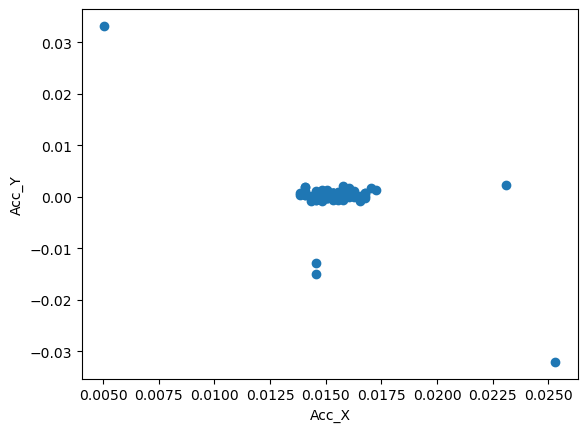

In [7]:
plt.scatter(df['X'],df['Y'])
plt.xlabel("Acc_X")
plt.ylabel("Acc_Y")
plt.show()

Text(0, 0.5, 'Acc_Z')

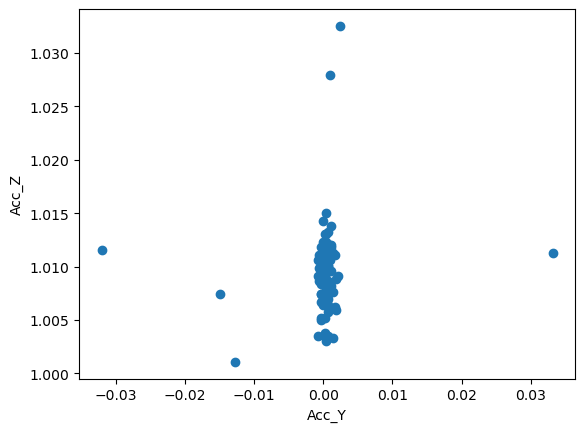

In [8]:
plt.scatter(df["Y"],df["Z"])
plt.xlabel("Acc_Y")
plt.ylabel("Acc_Z")

### Choose Relevant Columns

### In this example, we will use the numerical ones: X, Y, and Z direction acceleration values

In [9]:
relevant_cols = ["X","Y","Z"]

final_df = df[relevant_cols]
final_df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


### Data Transformation

#### Kmeans is sensitive to the measurement units and scales of the data. 
#### It is better to standardize the data first to tackle this issue

#### The standardization substracts the mean of any feature from the actual values of that feature and divides the feature’s standard deviation.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_df)

StandardScaler()

### Here it needs to apply transformation to raw data

In [11]:
scaled_data = scaler.transform(final_df)
scaled_data

array([[-0.46128391, -2.9749853 , -0.53177541],
       [-0.73504371,  0.34922248, -0.16545644],
       [-0.32440485,  0.01198401,  0.56720576],
       [-0.73504371,  0.20469171,  0.56720576],
       [-0.46128391, -2.54139317, -2.1192064 ],
       [ 4.3295022 ,  0.44557633,  5.75682218],
       [-0.18752524,  0.20469171,  0.62825905],
       [-0.46128391, -0.03619291, -0.16545644],
       [ 0.22311418, -0.03619291,  0.0787562 ],
       [-0.32440485, -0.08436983, -0.04335012],
       [-0.46128391,  0.06016094, -0.28756277],
       [-0.18752524,  0.10833786,  0.26191556],
       [-0.32440485,  0.15651479,  0.38402188],
       [ 0.49687286, -0.03619291, -0.5928287 ],
       [ 0.22311418, -0.03619291,  0.26191556],
       [-0.18752524, -0.08436983, -0.10440341],
       [-0.18752524,  0.15651479,  0.26191556],
       [ 0.35999324,  0.10833786, -0.65390625],
       [ 1.04439134,  0.25286864, -1.56970355],
       [ 0.35999324,  0.06016094, -1.56970355],
       [ 0.63375304, -0.18072368, -1.508

### Determine the best number of cluster

#### A clustering model will not be relevant if we fail to identify the correct number of clusters to consider. Multiple techniques exist in the literature. We are going to consider the Elbow method, which is a heuristic method, and one of the widely used to find the optimal number of clusters.

In [12]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
    return clusters_centers, k_values


In [13]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [14]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

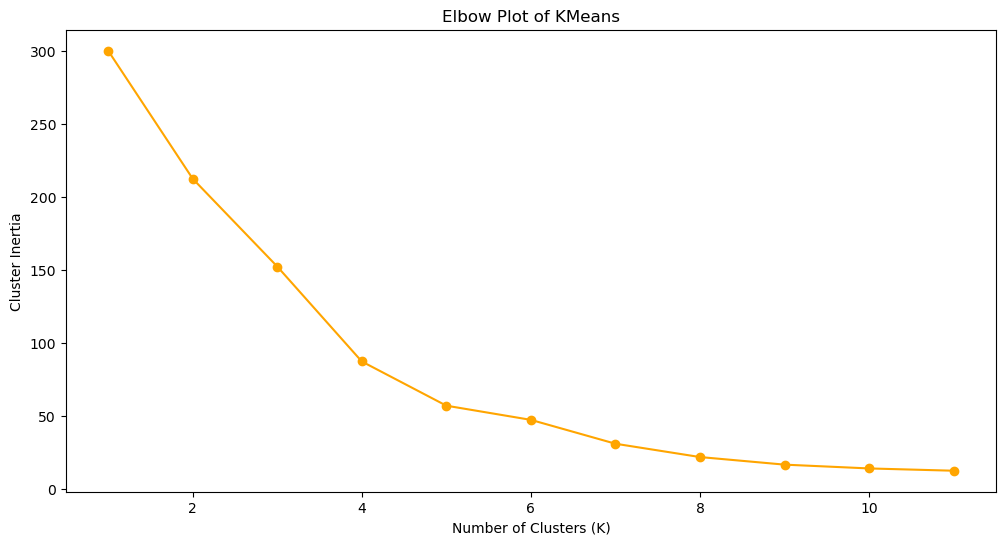

In [15]:
generate_elbow_plot(clusters_centers, k_values)

### Can anyone tell me optimal number of clusters identified in IoT data. 

### 6 different patterns are present in IoT data